In [40]:
import simpy
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt
import pandas as pd
import scipy.stats as st
plt.style.use('seaborn')

In [41]:
#This formula is based on page 114 and 115 of 'Queueing Theory' of Ivo Adan and Jacques Resing
# It is a recursion formula utilizing the relation between the delay probability (W) and the blocking probability (B)
# The recursion is computed, wherafter the delay probability is calculated
# The Little Law then is used to calculate the mean waiting time
def theoretical_mmn(rho, mu, n):
    def W(n, rho):
        def B(n, rho):
            B = 1
            for i in range(1, n+1):
                B = rho * B / (i + rho * B)
            return B
        B2 = B(n-1, n* rho)
        return rho * B2 / (1 - rho + rho * B2)
    w = W(n, rho)
    return w / (n * mu) * ( 1 / (1 - rho))

In [42]:
class DES(object):
    def __init__(self, env, arrival_rate, service_rate, servers, n_samples):
        self.env = env
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.servers = servers
        self.n_samples = n_samples
        self.force = env.event()
        self.action = env.process(self.run())
        self.waiting_times = []
        
    def run(self):
        while True:
            if len(self.waiting_times) > self.n_samples:
                self.force.succeed()
                self.force = self.env.event()
            
            arrival_time = random.expovariate(self.arrival_rate)
            yield self.env.timeout(arrival_time)
            
            service_time = random.expovariate(self.service_rate)
            self.env.process(self.service(service_time))
            
            
    def service(self, service_time):
        before = env.now
        with self.servers.request() as req:
            yield req
            self.waiting_times.append(env.now - before)
            yield self.env.timeout(service_time)

In [43]:
n_samples = 10000
n_servers = np.array([1, 2, 4])
steps = 10
arrival_rate = n_servers
p_min = 0.5
p_max = 0.9
p_range = np.linspace(p_min, p_max, steps)
service_rate = (1 / p_range)
waiting_times_mmn = np.zeros((len(n_servers), steps, n_samples))

In [44]:
for i in range(len(n_servers)):
    for j in range(len(service_rate)):
        env = simpy.Environment()
        servers = simpy.Resource(env, capacity = n_servers[i])
        des = DES(env, arrival_rate[i], (service_rate[j]), servers, n_samples)
        env.run(until = des.force)
        waiting_times_mmn[i, j, :] = des.waiting_times[:n_samples]

In [45]:
mean_waiting_times = np.zeros((len(n_servers), steps))

for i in range(len(n_servers)):
    for j in range(steps):
        mean_waiting_times[i, j] = np.mean(waiting_times_mmn[i, j, :])

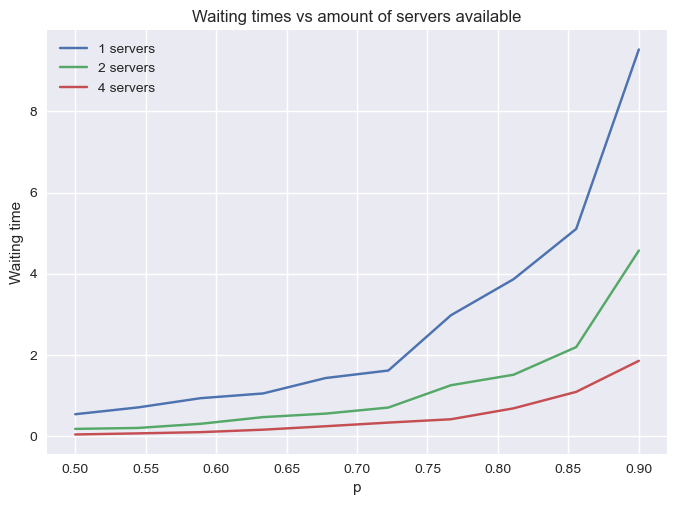

In [46]:
for i in range(len(n_servers)):
    plt.plot(p_range, mean_waiting_times[i], label = '%s servers' % n_servers[i])
plt.xlabel("p")
plt.ylabel("Waiting time")
plt.title("Waiting times vs amount of servers available")
plt.legend()
    

In [47]:
#Let's zoom out a bit 

n_samples = 10000
n_servers = np.array([1, 2, 4])
steps = 10
arrival_rate = n_servers
p_min = 0.001
p_max = 0.999
p_range = np.linspace(p_min, p_max, steps)
service_rate = (1 / p_range)
waiting_times_mmn = np.zeros((len(n_servers), steps, n_samples))

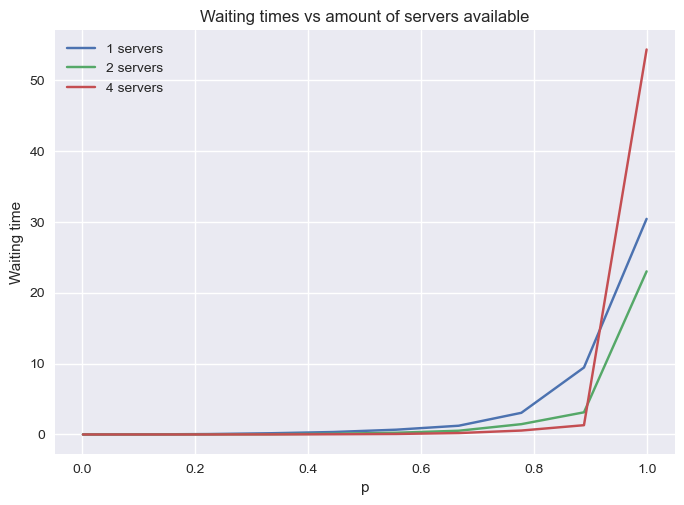

In [48]:
for i in range(len(n_servers)):
    for j in range(len(service_rate)):
        env = simpy.Environment()
        servers = simpy.Resource(env, capacity = n_servers[i])
        des = DES(env, arrival_rate[i], (service_rate[j]), servers, n_samples)
        env.run(until = des.force)
        waiting_times_mmn[i, j, :] = des.waiting_times[:n_samples]
        
mean_waiting_times = np.zeros((len(n_servers), steps))

for i in range(len(n_servers)):
    for j in range(steps):
        mean_waiting_times[i, j] = np.mean(waiting_times_mmn[i, j, :])
        
for i in range(len(n_servers)):
    plt.plot(p_range, mean_waiting_times[i], label = '%s servers' % n_servers[i])
plt.xlabel("p")
plt.ylabel("Waiting time")
plt.title("Waiting times vs amount of servers available")
plt.legend()

In [49]:
#Let's zoom in a bit 

n_samples = 10000
n_servers = np.array([1, 2, 4])
steps = 10
arrival_rate = n_servers
p_min = 0.8
p_max = 0.999
p_range = np.linspace(p_min, p_max, steps)
service_rate = (1 / p_range)
waiting_times_mmn = np.zeros((len(n_servers), steps, n_samples))

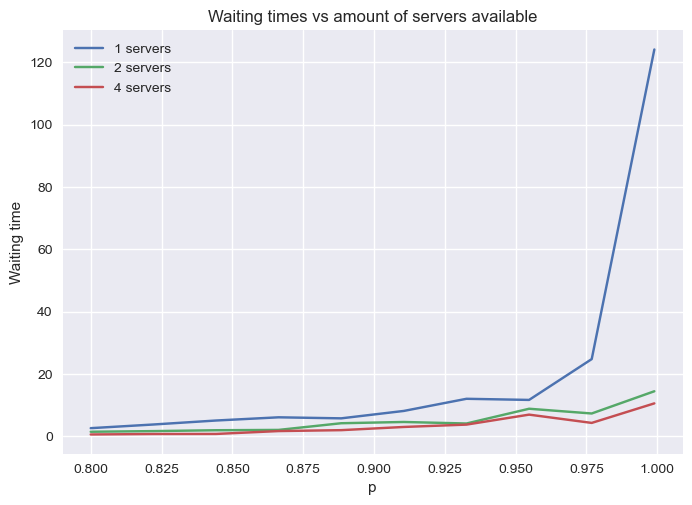

In [50]:
for i in range(len(n_servers)):
    for j in range(len(service_rate)):
        env = simpy.Environment()
        servers = simpy.Resource(env, capacity = n_servers[i])
        des = DES(env, arrival_rate[i], (service_rate[j]), servers, n_samples)
        env.run(until = des.force)
        waiting_times_mmn[i, j, :] = des.waiting_times[:n_samples]
        
mean_waiting_times = np.zeros((len(n_servers), steps))

for i in range(len(n_servers)):
    for j in range(steps):
        mean_waiting_times[i, j] = np.mean(waiting_times_mmn[i, j, :])
        
for i in range(len(n_servers)):
    plt.plot(p_range, mean_waiting_times[i], label = '%s servers' % n_servers[i])
plt.xlabel("p")
plt.ylabel("Waiting time")
plt.title("Waiting times vs amount of servers available")
plt.legend()

In [51]:
np.savetxt("mean_waiting_time_0.8-1.csv", mean_waiting_times, delimiter=",")

In [52]:
"""
Let's (for now) focus on the mean waiting times from p = 0.8 till 0.999. Lets make boxplots
"""

"\nLet's (for now) focus on the mean waiting times from p = 0.8 till 0.999. Lets make boxplots\n"

In [53]:
mean_waiting_time_outer = genfromtxt('mean_waiting_time_0.8-1.csv', delimiter=',')

In [54]:
df = pd.DataFrame(data = mean_waiting_time_outer.T, columns = ('1', '2', '4'))
df = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['1', '2', '4'])
df.columns = ['index', 'Servers', 'Waiting Time']

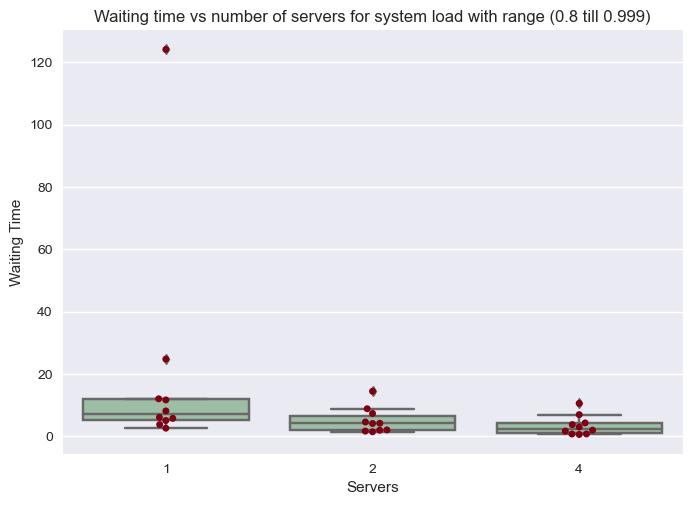

In [55]:
ax = sns.boxplot(x='Servers', y='Waiting Time', data=df, color='#99c2a2')
ax = sns.swarmplot(x="Servers", y="Waiting Time", data=df, color='#7d0013')
plt.title("Waiting time vs number of servers for system load with range (0.8 till 0.999)")
plt.show()

In [56]:
"""
I will now look at the samole variance with varying rho values. While doing so, I noticed a lot of stochasticity in the results,
my sample sizes were 1000, 3000, 5000, 10000, therefore I made the difference bigger to 1000, 5000, 10000, 20000.

Update: Still a lot of stochasticity, so I am going to use lower numbers of customers. 
"""

'\nI will now look at the samole variance with varying rho values. While doing so, I noticed a lot of stochasticity in the results,\nmy sample sizes were 1000, 3000, 5000, 10000, therefore I made the difference bigger to 1000, 5000, 10000, 20000.\n\nUpdate: Still a lot of stochasticity, so I am going to use lower numbers of customers. \n'

In [57]:
#Lets focus on the sample variance with varying p_values
n_samples = np.array([120, 1000, 10000, 100000])
n_servers = np.array([1, 2, 4])
steps = 9
p_min = 0.1
p_max = 0.9
p_range = p_range = np.linspace(p_min, p_max, steps)
arrival_rate = p_range
service_rate = 1
waiting_time_variance = []
count = 0

In [58]:
for k in range(len(n_samples)):
    #random.seed(random.random())
    waiting_times_mmn = np.zeros((len(n_servers), steps, n_samples[k]))
    for i in range(len(n_servers)):
        for j in range(len(arrival_rate)):
            env = simpy.Environment()
            servers = simpy.Resource(env, capacity = n_servers[i])
            des = DES(env, arrival_rate[j], (service_rate), servers, n_samples[k])
            env.run(until = des.force)
            waiting_times_mmn[i, j, :] = des.waiting_times[:n_samples[k]]
    count += 1
    print(count/len(n_samples) * 100,'%done!')
    waiting_time_variance.append(waiting_times_mmn)

25.0 %done!
50.0 %done!
75.0 %done!
100.0 %done!


In [59]:
mean_variance = np.zeros((len(n_samples), len(n_servers), steps))
sample_variance = np.zeros((len(n_samples), len(n_servers), steps))
for k in range(len(n_samples)):  
    for i in range(len(n_servers)):
        for j in range(steps):
            mean_variance[k,i,j]=(np.mean(waiting_time_variance[k][i][j]))
            sample_variance[k,i,j]=(np.var(waiting_time_variance[k][i][j]))

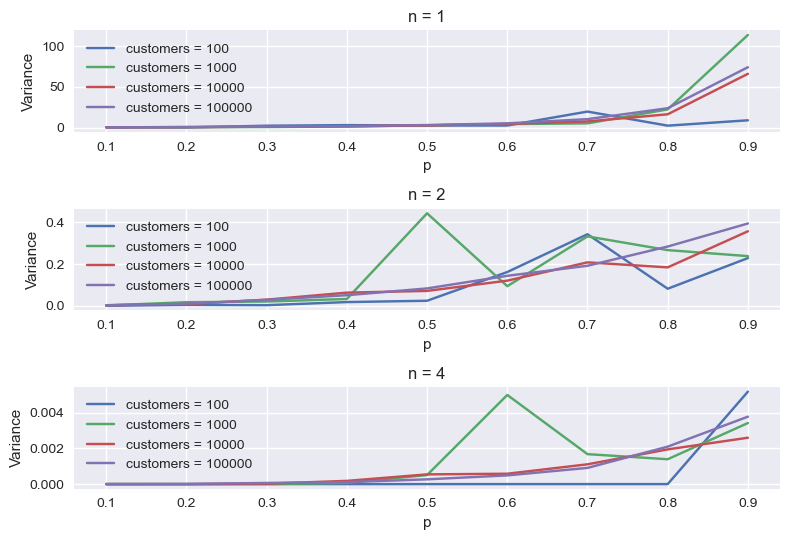

In [60]:
fig, (ax1,ax2, ax3) = plt.subplots(3, 1)

ax1.plot(p_range, sample_variance[0][0], label = "customers = 100")
ax1.plot(p_range, sample_variance[1][0], label = "customers = 1000")
ax1.plot(p_range, sample_variance[2][0], label = "customers = 10000")
ax1.plot(p_range, sample_variance[3][0], label = "customers = 100000")
ax1.legend()
ax1.set_xlabel('p')
ax1.set_ylabel("Variance")
ax1.set_title("n = 1")
ax2.plot(p_range, sample_variance[0][1], label = "customers = 100")
ax2.plot(p_range, sample_variance[1][1], label = "customers = 1000")
ax2.plot(p_range, sample_variance[2][1], label = "customers = 10000")
ax2.plot(p_range, sample_variance[3][1], label = "customers = 100000")
ax2.legend()
ax2.set_xlabel('p')
ax2.set_ylabel("Variance")
ax2.set_title("n = 2")
ax3.plot(p_range, sample_variance[0][2], label = "customers = 100")
ax3.plot(p_range, sample_variance[1][2], label = "customers = 1000")
ax3.plot(p_range, sample_variance[2][2], label = "customers = 10000")
ax3.plot(p_range, sample_variance[3][2], label = "customers = 100000")
ax3.legend()
ax3.set_xlabel('p')
ax3.set_ylabel("Variance")
ax3.set_title("n = 4")
plt.tight_layout()
#plt.savefig("variance_customersize")

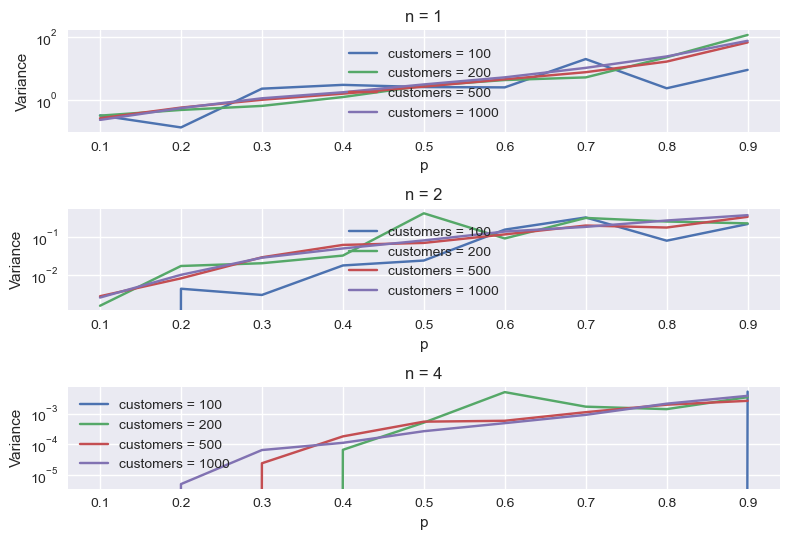

In [61]:
fig, (ax1,ax2, ax3) = plt.subplots(3, 1)

ax1.plot(p_range, sample_variance[0][0], label = "customers = 100")
ax1.plot(p_range, sample_variance[1][0], label = "customers = 200")
ax1.plot(p_range, sample_variance[2][0], label = "customers = 500")
ax1.plot(p_range, sample_variance[3][0], label = "customers = 1000")
ax1.legend()
ax1.set_xlabel('p')
ax1.set_ylabel("Variance")
ax1.set_title("n = 1")
ax1.set_yscale('log')
ax2.plot(p_range, sample_variance[0][1], label = "customers = 100")
ax2.plot(p_range, sample_variance[1][1], label = "customers = 200")
ax2.plot(p_range, sample_variance[2][1], label = "customers = 500")
ax2.plot(p_range, sample_variance[3][1], label = "customers = 1000")
ax2.legend()
ax2.set_xlabel('p')
ax2.set_ylabel("Variance")
ax2.set_title("n = 2")
ax2.set_yscale('log')
ax3.plot(p_range, sample_variance[0][2], label = "customers = 100")
ax3.plot(p_range, sample_variance[1][2], label = "customers = 200")
ax3.plot(p_range, sample_variance[2][2], label = "customers = 500")
ax3.plot(p_range, sample_variance[3][2], label = "customers = 1000")
ax3.legend()
ax3.set_xlabel('p')
ax3.set_ylabel("Variance")
ax3.set_title("n = 4")
ax3.set_yscale('log')
plt.tight_layout()
#plt.savefig("variance_customersize_log")

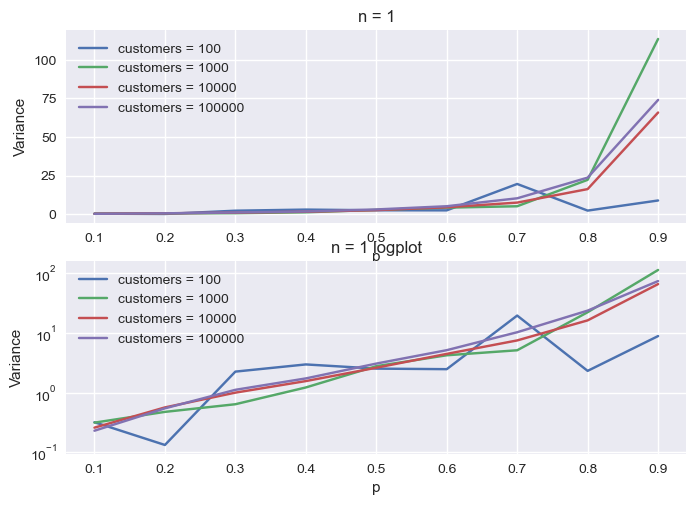

In [62]:
fig, (ax1,ax2) = plt.subplots(2, 1)

ax1.plot(p_range, sample_variance[0][0], label = "customers = 100")
ax1.plot(p_range, sample_variance[1][0], label = "customers = 1000")
ax1.plot(p_range, sample_variance[2][0], label = "customers = 10000")
ax1.plot(p_range, sample_variance[3][0], label = "customers = 100000")
ax1.legend()
ax1.set_xlabel('p')
ax1.set_ylabel("Variance")
ax1.set_title("n = 1")
ax2.plot(p_range, sample_variance[0][0], label = "customers = 100")
ax2.plot(p_range, sample_variance[1][0], label = "customers = 1000")
ax2.plot(p_range, sample_variance[2][0], label = "customers = 10000")
ax2.plot(p_range, sample_variance[3][0], label = "customers = 100000")
ax2.legend()
ax2.set_xlabel('p')
ax2.set_ylabel("Variance")
ax2.set_title("n = 1 logplot")
ax2.set_yscale('log')
#plt.savefig("variance_log_customers_log.png")

In [63]:
# Lets make a plot with the theoretical values included

n_samples = 1000
n_servers = np.array([1, 2, 4])
steps = 18
arrival_rate = n_servers
p_min = 0.1
p_max = 0.9
p_range = np.linspace(p_min, p_max, steps)
service_rate = (1 / p_range)
waiting_times_mmn = np.zeros((len(n_servers), steps, n_samples))
waiting_times_theoretical = np.zeros((len(n_servers), steps))

In [64]:
for i in range(len(n_servers)):
    for j in range(len(service_rate)):
        env = simpy.Environment()
        servers = simpy.Resource(env, capacity = n_servers[i])
        des = DES(env, arrival_rate[i], (service_rate[j]), servers, n_samples)
        env.run(until = des.force)
        waiting_times_mmn[i, j, :] = des.waiting_times[:n_samples]
        waiting_times_theoretical[i, j] = theoretical_mmn(p_range[j], service_rate[j], n_servers[i])


In [65]:
mean_waiting_times = np.zeros((len(n_servers), steps))

for i in range(len(n_servers)):
    for j in range(steps):
        mean_waiting_times[i, j] = np.mean(waiting_times_mmn[i, j, :])
        

In [66]:
waiting_times_theoretical

array([[1.11111111e-02, 2.53549696e-02, 4.67582653e-02, 7.66529868e-02,
        1.16723384e-01, 1.69130661e-01, 2.36694678e-01, 3.23165555e-01,
        4.33641771e-01, 5.75236020e-01, 7.58178888e-01, 9.97737557e-01,
        1.31775026e+00, 1.75762305e+00, 2.38751793e+00, 3.34563280e+00,
        4.94705882e+00, 8.10000000e+00],
       [1.01010101e-03, 3.25063712e-03, 7.60109732e-03, 1.48946562e-02,
        2.61161908e-02, 4.24689325e-02, 6.54687407e-02, 9.70826564e-02,
        1.39940173e-01, 1.97667976e-01, 2.75443266e-01, 3.80954340e-01,
        5.26168831e-01, 7.30832952e-01, 1.03006627e+00, 1.49300226e+00,
        2.27721755e+00, 3.83684211e+00],
       [2.20677480e-05, 1.39980620e-04, 5.20406836e-04, 1.43834822e-03,
        3.29678239e-03, 6.65108986e-03, 1.22468167e-02, 2.10803537e-02,
        3.44972735e-02, 5.43538142e-02, 8.32889718e-02, 1.25201351e-01,
        1.86130775e-01, 2.76006123e-01, 4.12441496e-01, 6.30055703e-01,
        1.00768638e+00, 1.77244484e+00]])

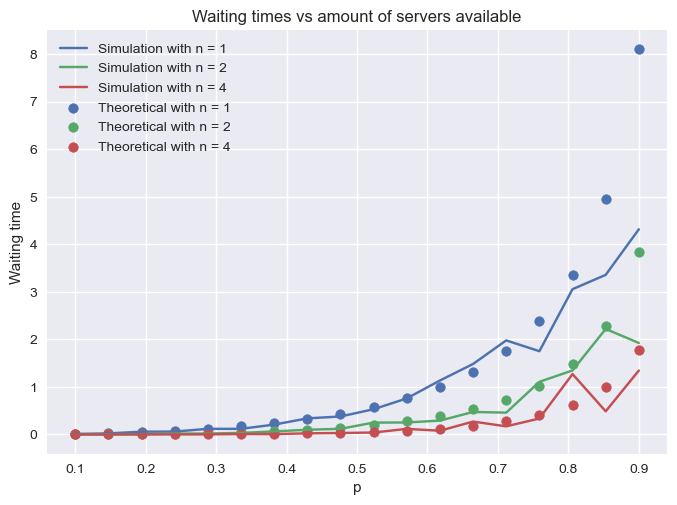

In [67]:
for i in range(len(n_servers)):
    plt.plot(p_range, mean_waiting_times[i], label = 'Simulation with n = %s' % n_servers[i])

for i in range(len(n_servers)):
    plt.scatter(p_range, waiting_times_theoretical[i], label = 'Theoretical with n = %s' % n_servers[i])
plt.xlabel("p")
plt.ylabel("Waiting time")
plt.title("Waiting times vs amount of servers available")
plt.legend()

In [68]:
# TO DO, T-TEST and VARIANCE (NORMALIZE / RESHAPE FIRST?)